# Analyzing Hotel Ratings on Tripadvisor

In this homework, we will analyze the data we scraped in Part 1 by fitting a regression model on the data.

** Task 1 (20 pts) **

Now, we will use regression to analyze this information. First, we will fit a linear regression model that predicts the average rating.

For example, the average rating of a hotel is calculated as follows:

![Information to be scraped](traveler_ratings.png)

$$ \text{AVG_SCORE} = \frac{1*15 + 2*21 + 3*55 + 4*228 + 5*1271}{1590}$$

Use the model to analyze the important factors that decide the $\text{AVG_SCORE}$.

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import sklearn.utils as utils
import sklearn.cross_validation as cross_validation
import statsmodels.api as sm

%matplotlib inline

In [158]:
df = pd.read_csv('attribute-ratings-summary.csv',sep=':',names=['Hotels','Attribute','Rating','Num of Ratings'])
# features = hotel name, attributes, rating
# response = total number of that rating 
df = df[df.Attribute != 'Business service (e.g., internet access)']
df = df[df.Attribute != 'Check in / front desk']

# Value, Location, Sleep Quality, Rooms, Cleanliness, Service.
# print (df)
# print (df.shape)
# (2425, 4)

In [54]:
def getAvgScoreForAttr(arrayOfRatings):
#     print (arrayOfRatings)
    num1 = arrayOfRatings[0]
    num2 = arrayOfRatings[1]
    num3 = arrayOfRatings[2]
    num4 = arrayOfRatings[3]
    num5 = arrayOfRatings[4]
    
    total = num1+num2+num3+num4+num5
    num = (1*num1) + (2*num2) + (3*num3) + (4*num4) + (5*num5)
    if (total > 0):
        return (num/total)
    else:
        return 0
    

In [55]:
def getDictOfAvgs(g):
    ctr = 0
    listOfNumRatings = []
    dictOfRoomAvgs = []

    listOfVals = (g.groupby('Hotels'))
    for h,row in listOfVals:
    #     print (h)
        listOfRows = (row.get_values())
#         print (listOfRows)
        for l in listOfRows:
            rating = l[2]
            num = l[3]
            listOfNumRatings.append(num)
        avg = (getAvgScoreForAttr(listOfNumRatings))
        dictOfRoomAvgs.append({'Average':avg,'Hotel':h,})
        listOfNumRatings=[] 
    return(dictOfRoomAvgs)

# print (temp)

In [56]:
#the target (or y) is the avergage score
#Xs are the attributes we scraped

roomGroup =(df.groupby(['Attribute']).get_group('Rooms'))
locGroup =(df.groupby(['Attribute']).get_group('Location'))
sleepGroup =(df.groupby(['Attribute']).get_group('Sleep Quality'))
valueGroup =(df.groupby(['Attribute']).get_group('Value'))
cleanGroup =(df.groupby(['Attribute']).get_group('Cleanliness'))
serviceGroup =(df.groupby(['Attribute']).get_group('Service'))


# print (len(serviceAvgs))
# print (roomAvgs[0]['Hotel'])

In [57]:
def getAvgScoreForHotel(arrayOfRatings):
#     print (arrayOfRatings)
    num1 = float(arrayOfRatings[0])
    num2 = float(arrayOfRatings[1])
    num3 = float(arrayOfRatings[2])
    num4 = float(arrayOfRatings[3])
    num5 = float(arrayOfRatings[4])
    
    total = num1+num2+num3+num4+num5
#     print (total)
    num = (5*num1) + (4*num2) + (3*num3) + (2*num4) + (1*num5)
    if (total > 0):
        return (num/total)
    else:
        return 0
    

In [58]:
def getAvgHotelRating(g):
    ctr = 0
    listOfNumRatings = []
    dictOfRoomAvgs = []
    
    listOfVals = (g.groupby('hotel_name'))
    for h,row in listOfVals:
#         print (h)
        listOfRows = (row.get_values())
        for l in listOfRows:
#             print (l)
            rating = l[1]
            num = l[2].replace(',','')
#             print (num)
            listOfNumRatings.append(num)
        avg = (getAvgScoreForHotel(listOfNumRatings))
        dictOfRoomAvgs.append({'Average':avg,'Hotel':h,})
        listOfNumRatings=[] 
    return(dictOfRoomAvgs)

In [100]:
#begin manipulation of traveler csv for part 2
def determineExcellence(df):
    dictOfHotelExcellence = []
    numRatings = []
    dfGrouped = df.groupby('hotel_name')
    for h,row in dfGrouped:
        rowList = (row.get_values())
        for l in rowList:
            count = (l[2].replace(',',''))
            numRatings.append(count)
        xFlag = calculateExcellence(numRatings)
#         print (xFlag)
        dictOfHotelExcellence.append({'Excellence':xFlag, 'Hotel':h})
        numRatings = []
    return (dictOfHotelExcellence)

def calculateExcellence(arr):
    num1 = float(arr[0])
    num2 = float(arr[1])
    num3 = float(arr[2])
    num4 = float(arr[3])
    num5 = float(arr[4])

    total = num1+num2+num3+num4+num5
#     print (total,num1)
    sixtyP = total * (.6)

    if (num1 > sixtyP):
        return 1
    else:
        return 0
    


In [101]:
#find avg score for each hotel
travelerDF = pd.read_csv('traverler_ratings.csv')
# print (travelerDF)
travelerDF = travelerDF[travelerDF.hotel_name != 'Omni Parker House']
travelerDF = travelerDF[travelerDF.hotel_name != 'Hotel Boston']

 
# for x in 

roomAvgs = getDictOfAvgs(roomGroup)
locAvgs = getDictOfAvgs(locGroup)
sleepAvgs = getDictOfAvgs(sleepGroup)
valueAvgs = getDictOfAvgs(valueGroup)
cleanAvgs = getDictOfAvgs(cleanGroup)
serviceAvgs = getDictOfAvgs(serviceGroup)
hotelAvgs = getAvgHotelRating(travelerDF)
hotelExc = determineExcellence(travelerDF)
# print ((hotelAvgs))
# print (hotelExc)
# for x in hotelAvgs:
#     print (x['Hotel'])

In [106]:
# Room, Location, sleep, value, clean, service, hotel average
temp = []
vectorsForAllHotels=[]
for h in zip(roomAvgs,locAvgs, sleepAvgs, valueAvgs, cleanAvgs,serviceAvgs):
#     print (h[0]['Hotel'])
    if (h[0]['Hotel'] !='BEST WESTERN University Hotel Boston-Brighton'):
        if (h[0]['Hotel']=='Courtyard by Marriott Boston Logan Airport'):
            h[0]['Hotel'] = 'Courtyard Boston Logan Airport'
        if (h[0]['Hotel']=='Courtyard by Marriott Boston Logan Airport'):
            h[0]['Hotel'] = 'Courtyard Boston Logan Airport'
        if (h[0]['Hotel']=='Courtyard by Marriott Boston Copley Square'):
            h[0]['Hotel'] = 'Courtyard Boston Copley Square'            
        temp.append(h[0]['Hotel'])
        for x in h:
            temp.append(x['Average'])
        vectorsForAllHotels.append(temp)
    temp=[]
    
count = 0
final = []
temp = []
yTemp = []
yFinal = []
yEXTemp = []
yEXFinal = []
for hotel in zip(vectorsForAllHotels,hotelAvgs, hotelExc):
#     print (hotel)
    for h in vectorsForAllHotels:
        if (hotel[0][0] in h[0] and not('Hyatt Regency Boston' in h[0]) and not('Hyatt Regency Boston' in h[0])):
            count+=1
            yTemp.append(hotel[1]['Average'])
            yEXTemp.append(hotel[2]['Excellence'])
            temp.append(h[1:])
        elif (h[0]==hotel[0][0]):
            yTemp.append(hotel[1]['Average'])
            yEXTemp.append(hotel[2]['Excellence'])
            count+=1
            temp.append(h[1:])
        final+=temp
        yFinal+=yTemp
        yEXFinal+=yEXTemp
        yEXTemp=[]
        temp=[]
        yTemp=[]

In [162]:
xDF = pd.DataFrame(final,columns=['Room','Location','Sleep','Value','Cleanlines','Service'])
yDF = pd.DataFrame(yFinal, columns=['Average Score'])
yEXdf = pd.DataFrame(yEXFinal, columns=['Excellence'])
# print (yEXdf)
# print (final)

Complete dataset shape is (79, 6)


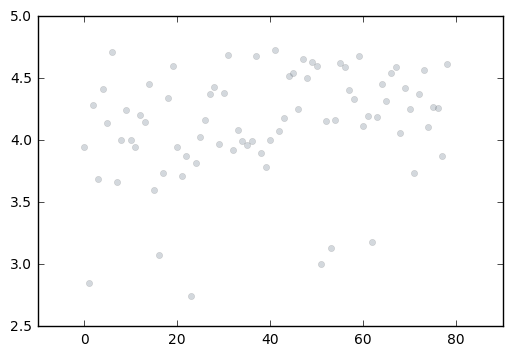

In [164]:
X_Trip = xDF[['Room','Location','Sleep','Value','Cleanlines','Service']]
print('Complete dataset shape is {}'.format(X_Trip.shape))
Y_Trip = yDF
plt.scatter(range(len(Y_Trip)), Y_Trip, c="slategray", alpha=0.3, linewidths=0.2)
# print (X_Trip)

In [45]:
X_Trip,Y_Trip = utils.shuffle(X_Trip,Y_Trip,random_state=1)
X_Trip_train,X_Trip_test,Y_Trip_train,Y_Trip_test = cross_validation.train_test_split(X_Trip,Y_Trip,test_size=.4,random_state=0)

print((X_Trip_train.shape),Y_Trip_train.shape)
print ((X_Trip_test.shape),Y_Trip_test.shape)

(47, 6) (47, 1)
(32, 6) (32, 1)


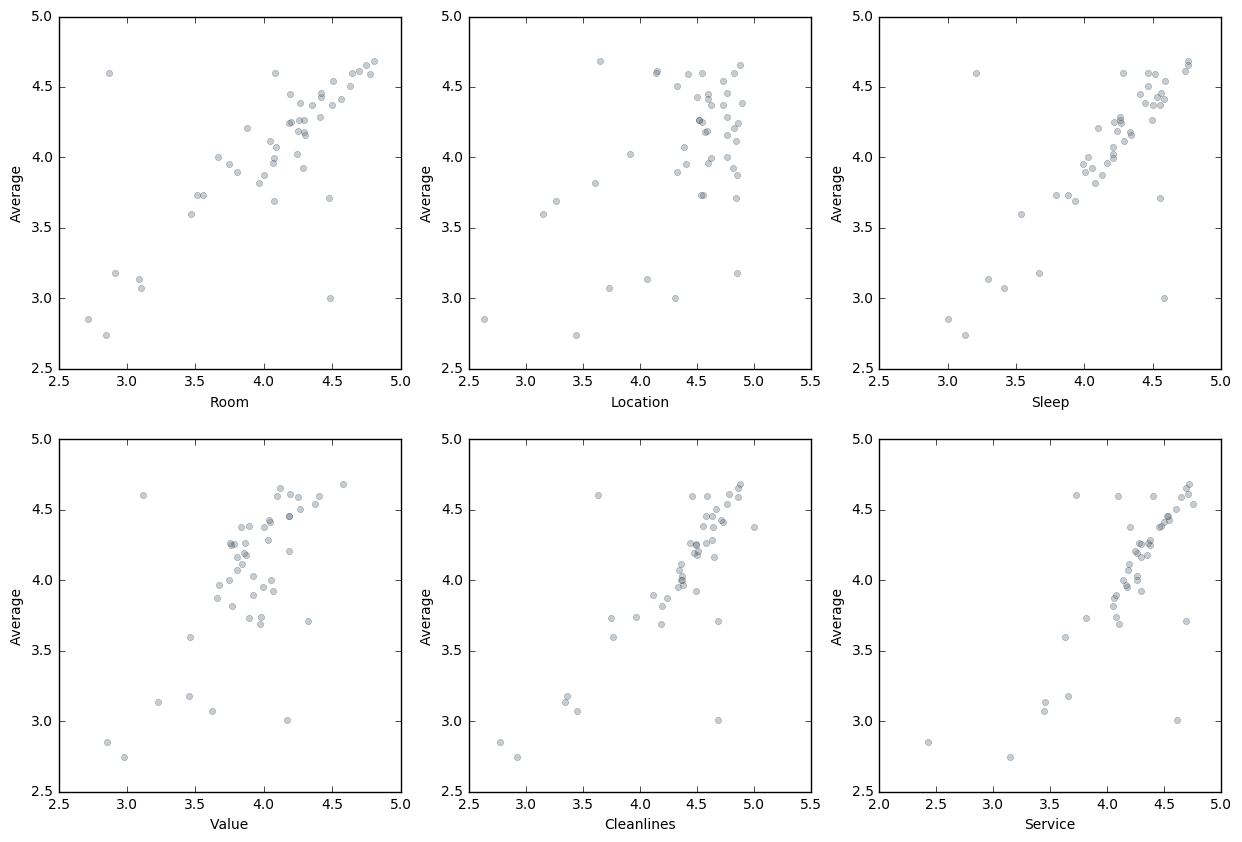

In [165]:
fig, axes = plt.subplots(2,3,figsize=(15,10))

for i in range(6):
    plt_i = i // 3
    plt_j = i % 3
    subX_train = X_Trip_train[X_Trip_train.columns[i]]
    # plt.subplot(2, 4, 1 + i)
    axes[plt_i][plt_j].scatter(subX_train, Y_Trip_train, c="slategray", alpha=0.4, linewidths=0.3)
    #plt.scatter(subX_test, y_test)
    axes[plt_i][plt_j].set_xlabel(X_Trip_train.columns[i])
    axes[plt_i][plt_j].set_ylabel('Average'); 


In [49]:
model = sm.OLS(Y_Trip_train, X_Trip_train)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          Average Score   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     1201.
Date:                Fri, 18 Nov 2016   Prob (F-statistic):           2.02e-44
Time:                        02:22:30   Log-Likelihood:                -11.188
No. Observations:                  47   AIC:                             34.38
Df Residuals:                      41   BIC:                             45.48
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Room          -0.3112      0.393     -0.792      0.4

Use the model to analyze the important factors that decide the $\text{AVG_SCORE}$.

For this model, the average score of each hotel is the dependent variable and the independent variables are the average scores for room, location, sleep, value, cleanliness, and service for each hotel.

The 95% confidence intervals show that cleanliness is the only significant independent variable. So this means that cleanliness is the important factor that decides average score.

If we also look at the p values, we see that both room and cleanliness have a p value less than point 5, which means that room could be significant also. But this really shows us that cleanliness is definitely significamnt for the average score.

The R-squared variable is 99.4% which means that we can use our regression equation to make very acurate predictions.



-------

** Task 2 (30 pts) **

Finally, we will use logistic regression to decide if a hotel is _excellent_ or not. We classify a hotel as _excellent_ if more than **60%** of its ratings are 5 stars. This is a binary attribute on which we can fit a logistic regression model. As before, use the model to analyze the data.

In [167]:
#I calculated the binary attribute in part 1
print (xDF)
# print (yEXdf)

        Room  Location     Sleep     Value  Cleanlines   Service
0   3.800000  4.250000  4.500000  4.000000    4.166667  3.909091
1   2.714286  2.636364  3.000000  2.857143    2.769231  2.428571
2   4.413695  4.760900  4.257824  4.027451    4.633113  4.379888
3   4.077259  3.261905  3.929245  3.969231    4.185028  4.103750
4   4.563265  4.595687  4.579580  4.045872    4.729730  4.502227
5   3.868421  4.803571  3.956522  3.731707    4.384615  4.238095
6   4.701031  4.818182  4.710259  4.265269    4.824275  4.800151
7   3.427338  4.443252  3.852670  3.736917    3.815451  3.891148
8   4.040532  4.719094  4.209266  3.677065    4.386243  4.122093
9   4.186155  4.859583  4.268608  3.758840    4.496833  4.377953
10  3.133301  4.583187  3.613716  3.251429    3.714756  3.603316
11  3.745787  4.403090  3.992366  3.996159    4.336352  4.174208
12  3.879046  4.821839  4.101744  4.185127    4.508972  4.241379
13  3.970395  4.663377  4.174931  4.118393    4.419456  4.170645
14  4.419118  4.768481  4

In [114]:
logit = sm.Logit(yEXdf, xDF)
result = logit.fit() 


Optimization terminated successfully.
         Current function value: 0.561392
         Iterations 6


In [115]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Excellence   No. Observations:                   79
Model:                          Logit   Df Residuals:                       73
Method:                           MLE   Df Model:                            5
Date:                Fri, 18 Nov 2016   Pseudo R-squ.:                  0.1006
Time:                        11:42:01   Log-Likelihood:                -44.350
converged:                       True   LL-Null:                       -49.309
                                        LLR p-value:                   0.07757
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Room           3.1421      2.114      1.486      0.137        -1.002     7.286
Location      -0.9977      0.611     -1.632      0.103        -2.196     0.201
Sleep         -0.5144      2.252     -0.228      0.819        -4.928     3.899
Value         -1.6329      1.605     -1.017      0.309        -4.779     1.513
Cleanlines    -3.5104      2.976     -1.180      0.238        -9.343     2.322
Service        3.4396      2.316      1.485      0.137        -1.099     7.978
==============================================================================
"""

As before, use the model to analyze the data:

For this model, the binary value determining hotel excellence is the dependent variable and the independent variables are the average scores for room, location, sleep, value, cleanliness, and service for each hotel.

The 95% confidence intervals show that there are no significant confidence intervals since each confidence interval contains 0.

But, if we also look at the p values, we see that room, location, value, cleanliness, and service all have p values that are less than .5 which means that these attributes could be significant in determining whether a hotel is significant.

The psuedo r squared value is .1006 which means that we are not too confident that our equation can be used to correctly predict hotel excellence.



In [129]:
r = xDF.Room.mean()
l = xDF.Location.mean()
s = xDF.Sleep.mean()
v = xDF.Value.mean()
c = xDF.Cleanlines.mean()
ser = xDF.Service.mean()

-------